## Import Libraries

In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn

import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

## Load Data and Preprocess

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.duplicated().sum()

0

### Data Description

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Chart

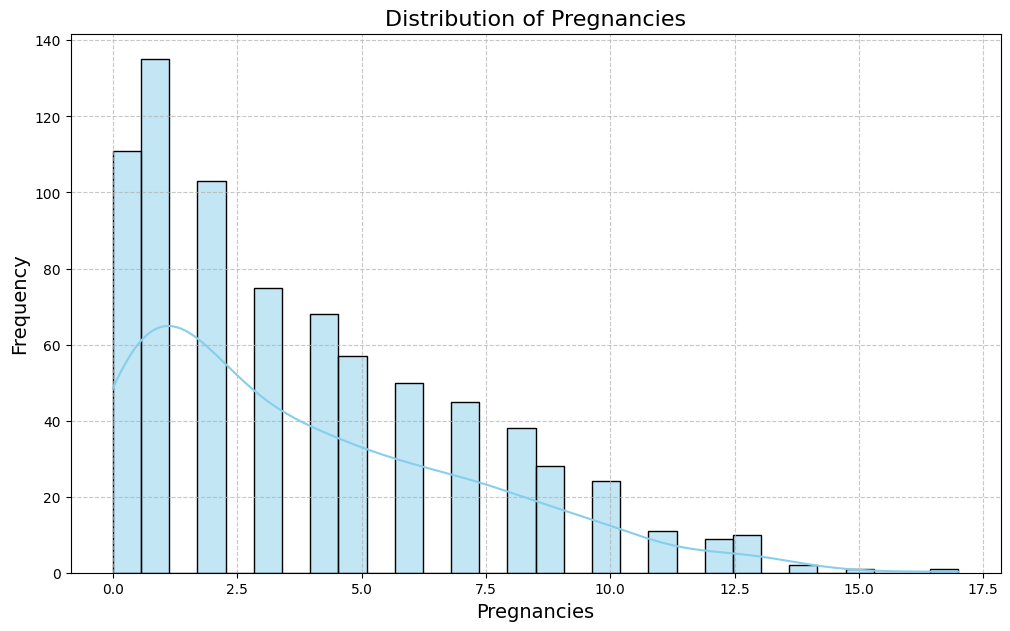

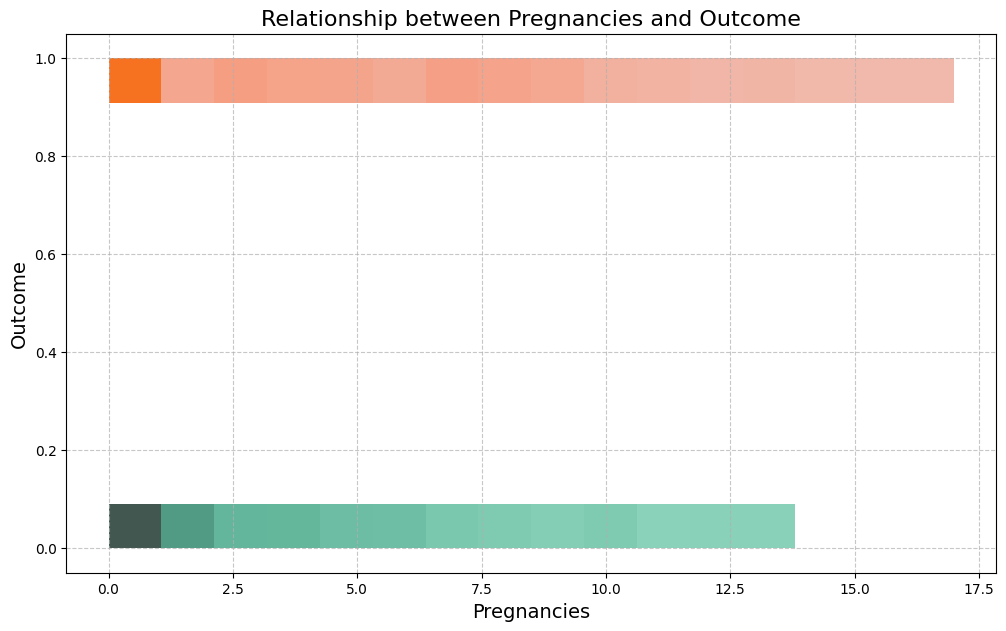

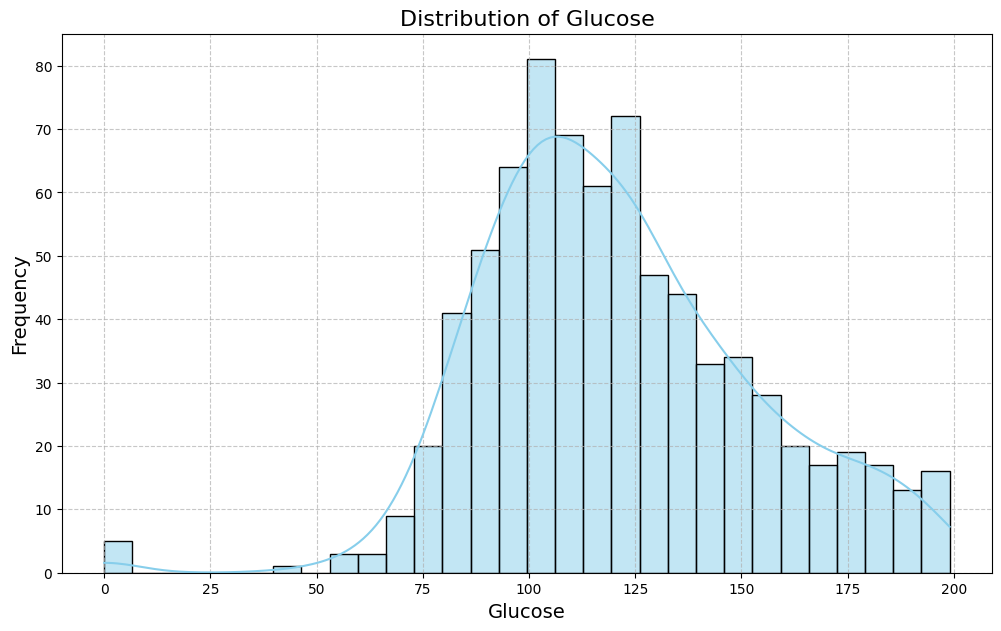

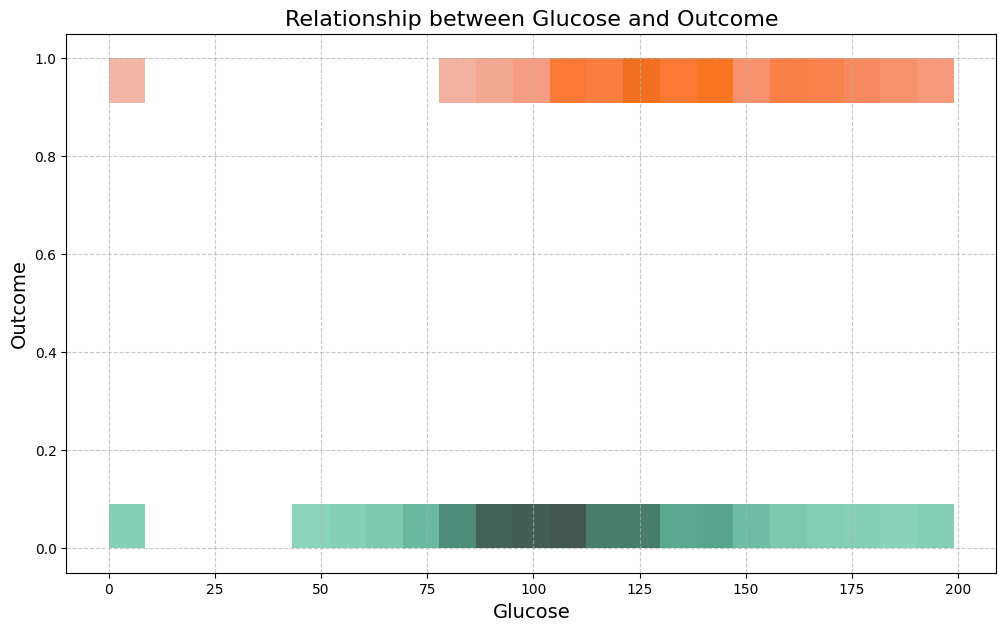

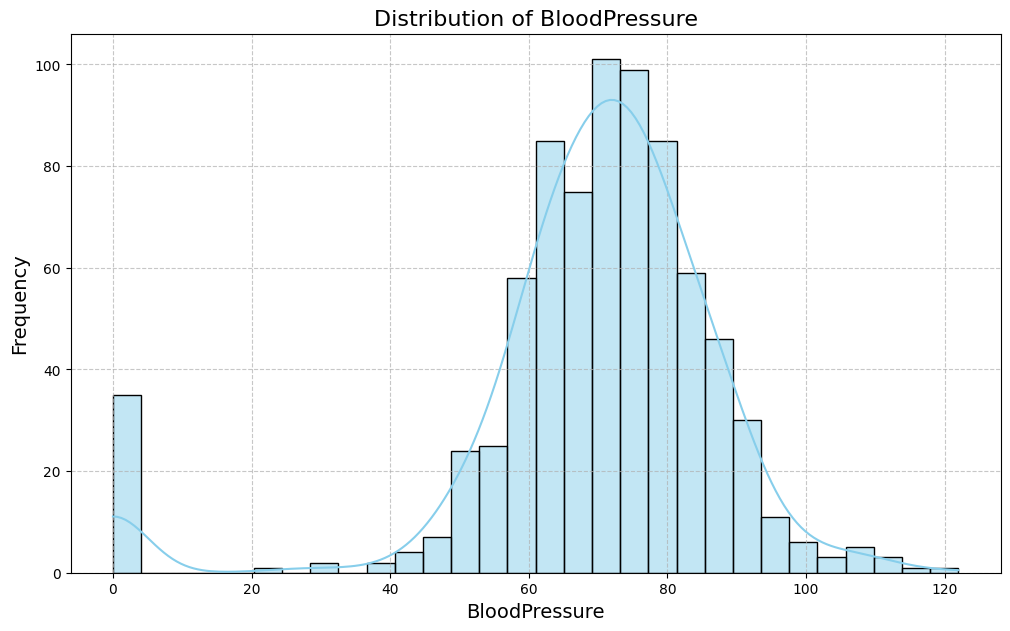

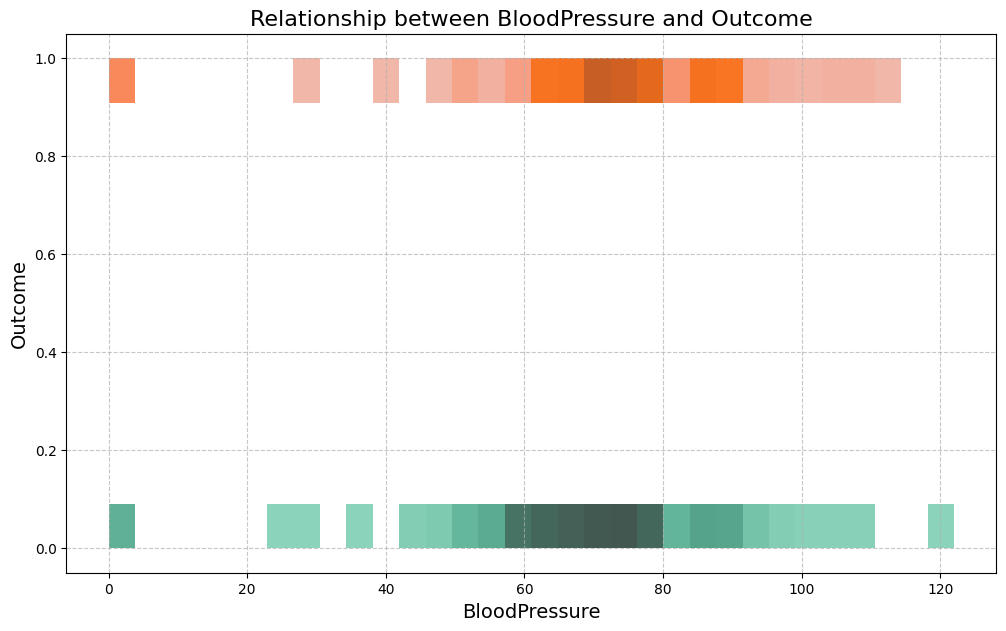

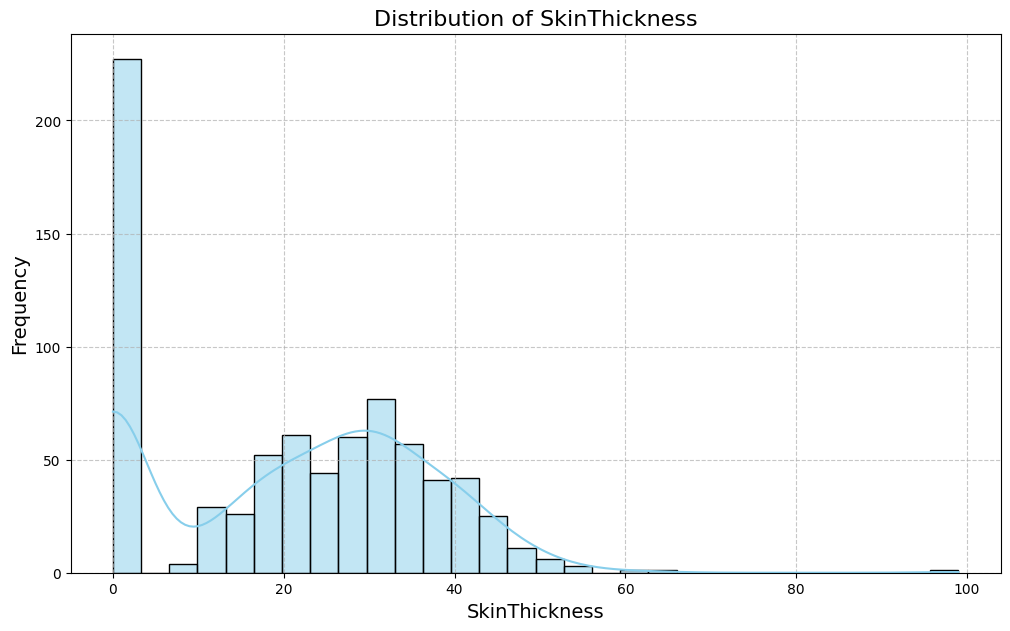

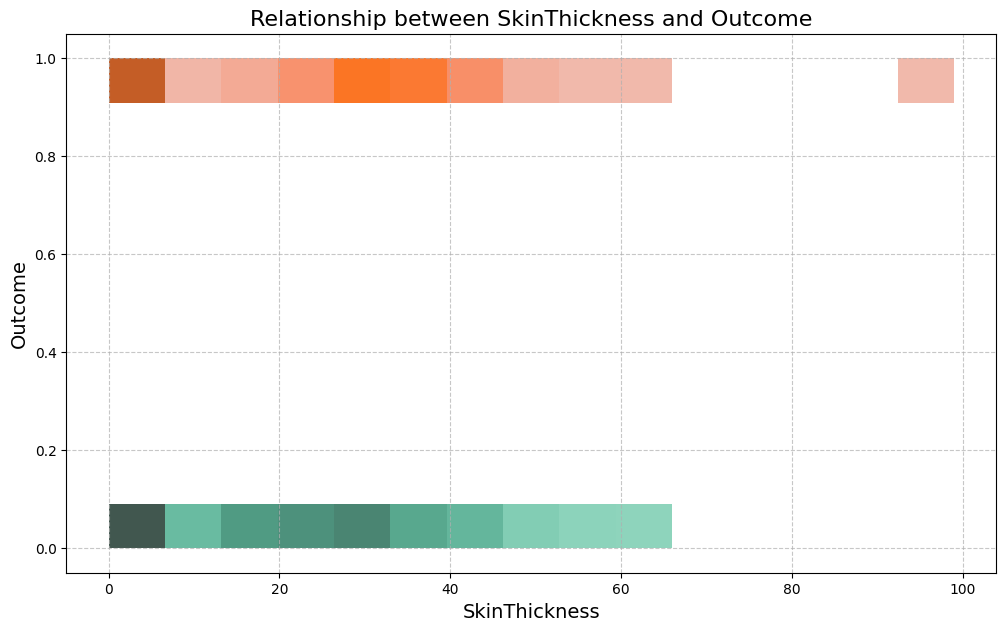

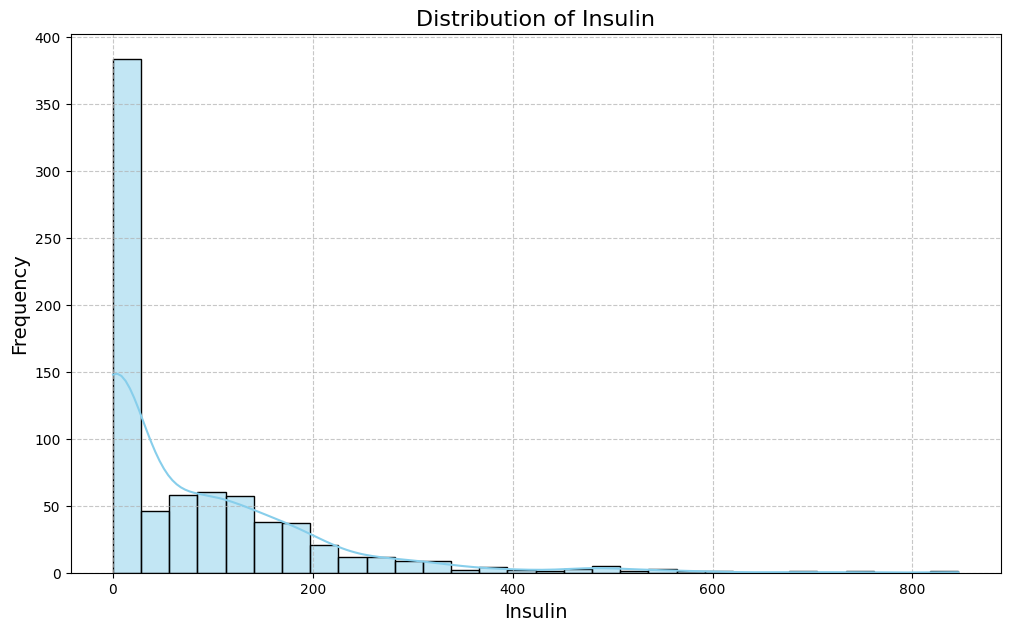

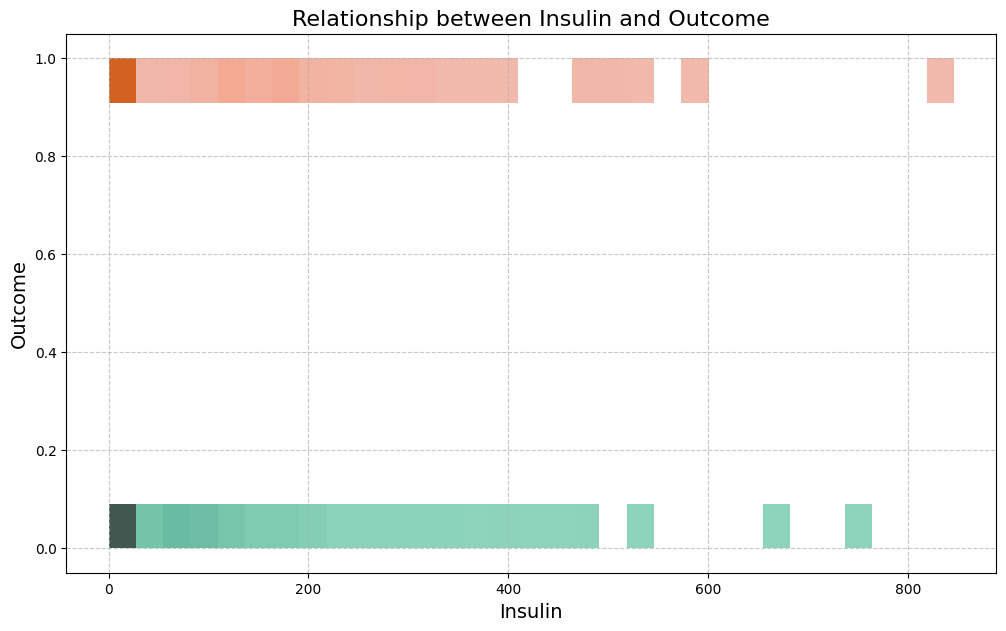

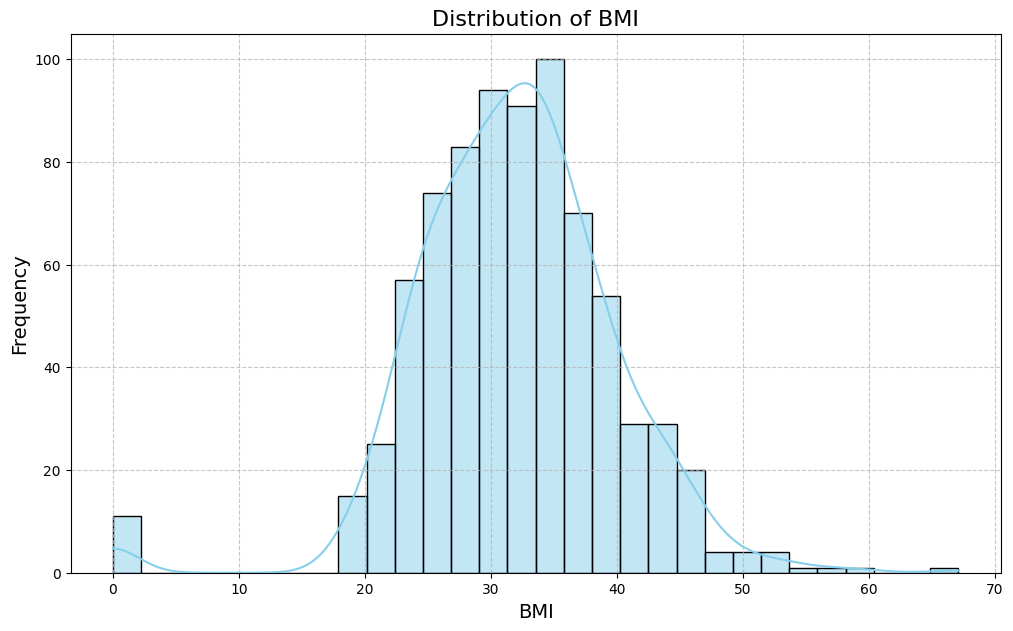

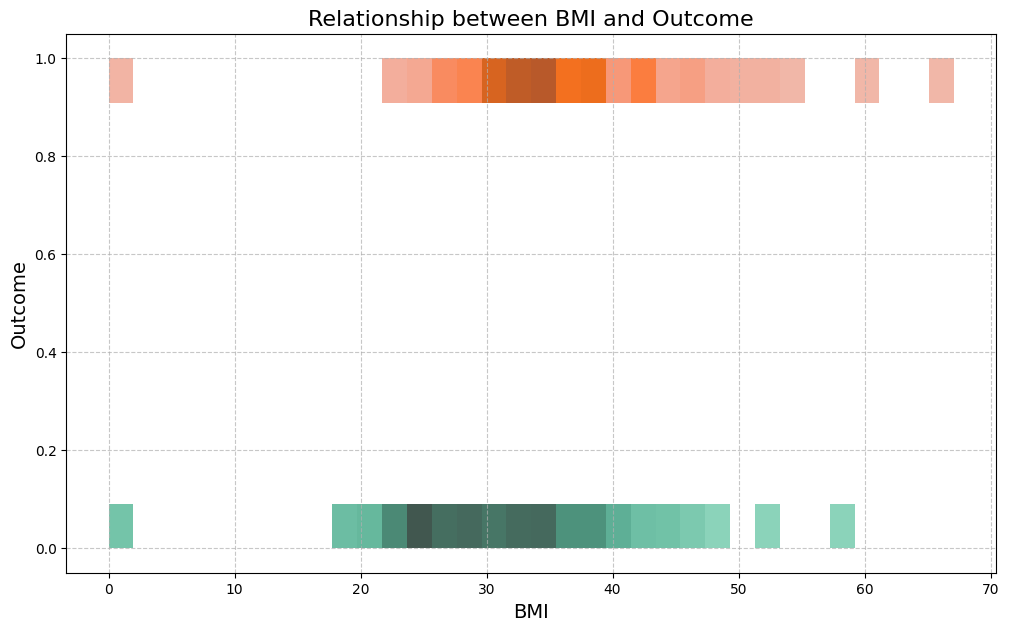

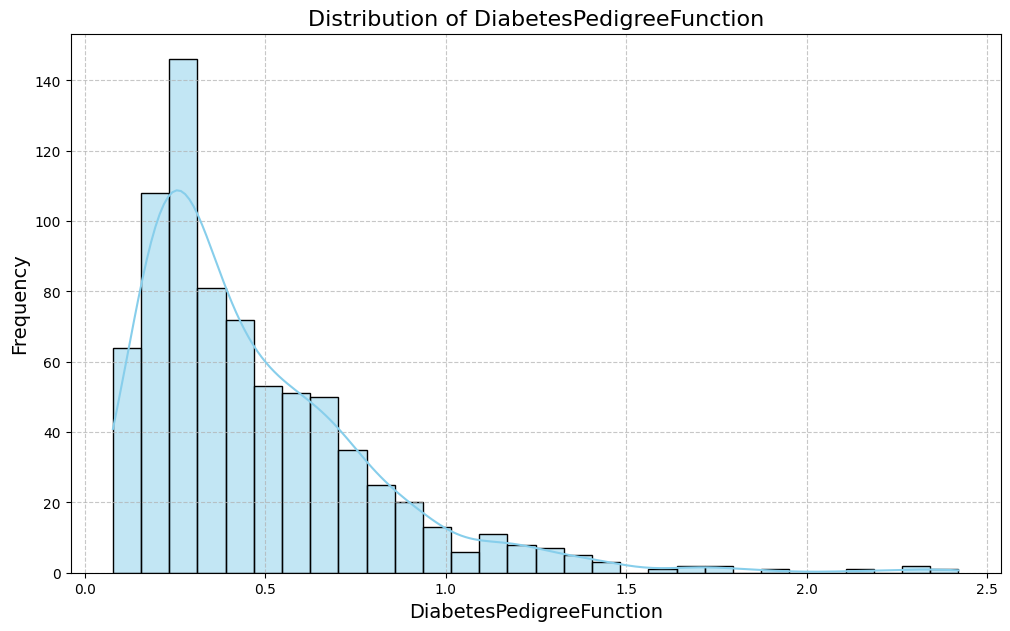

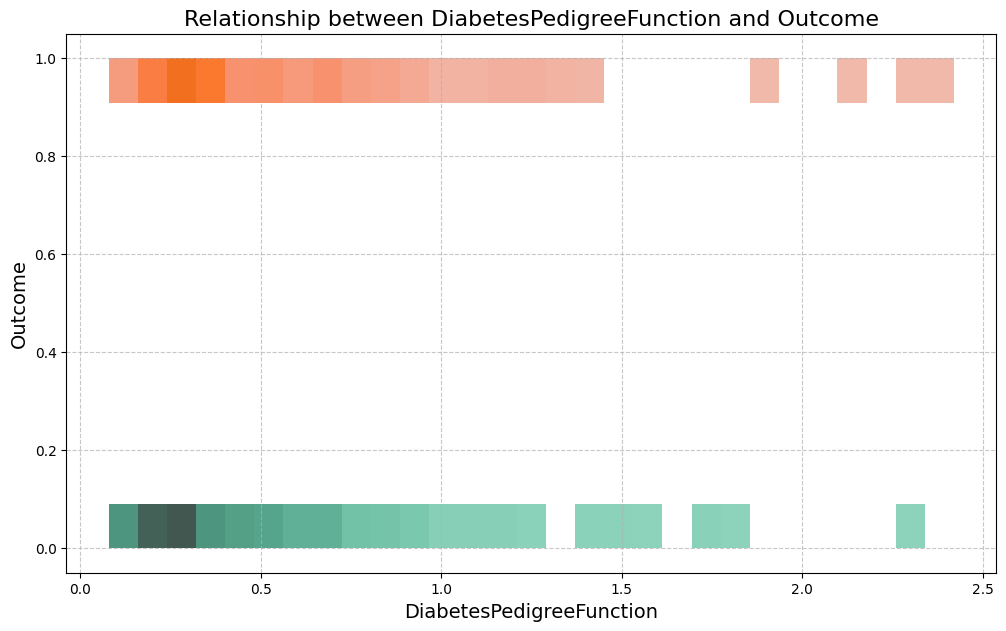

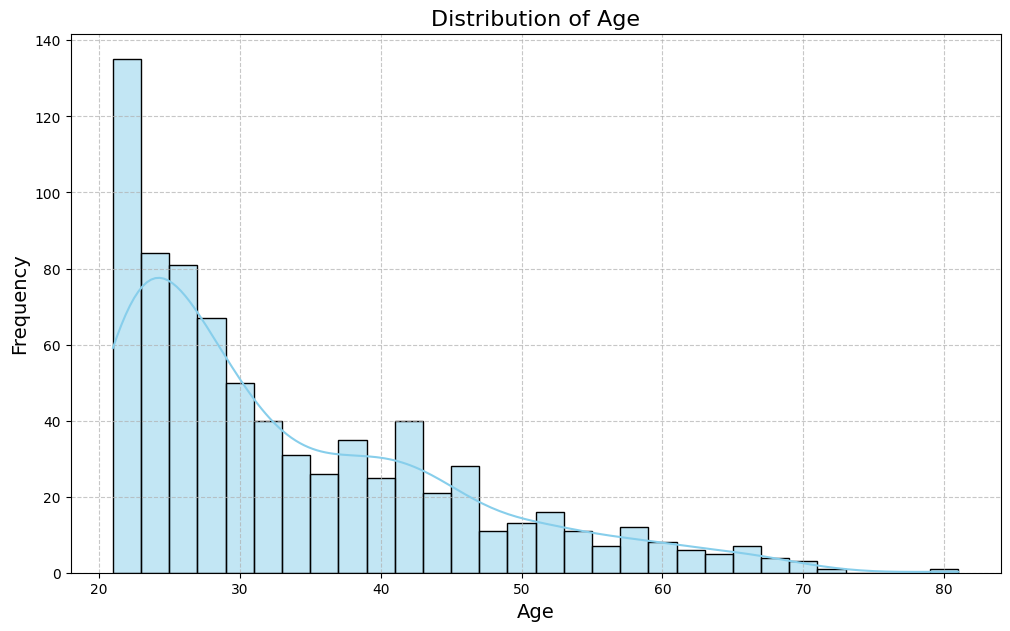

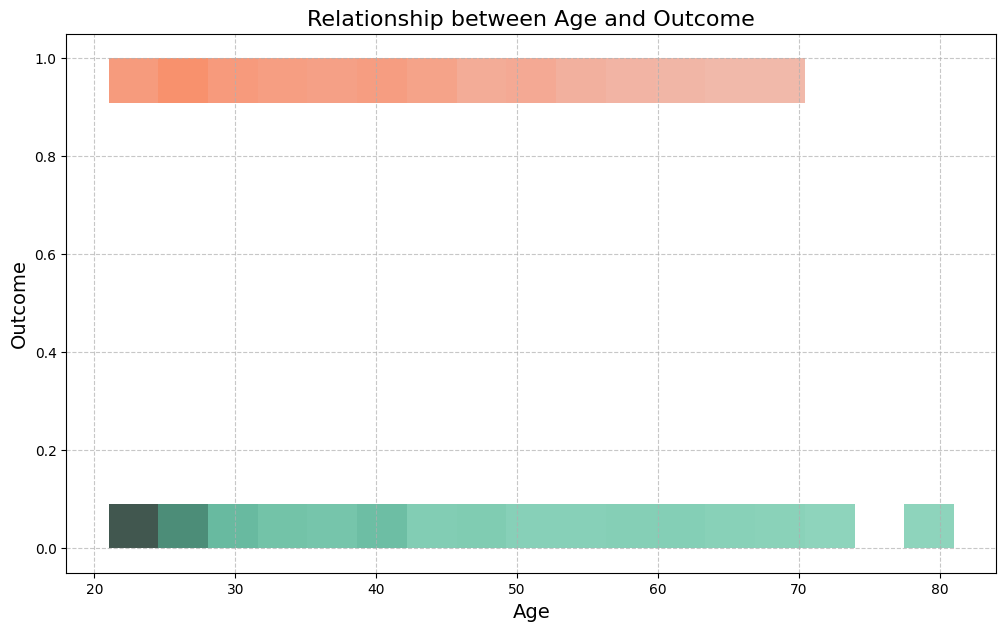

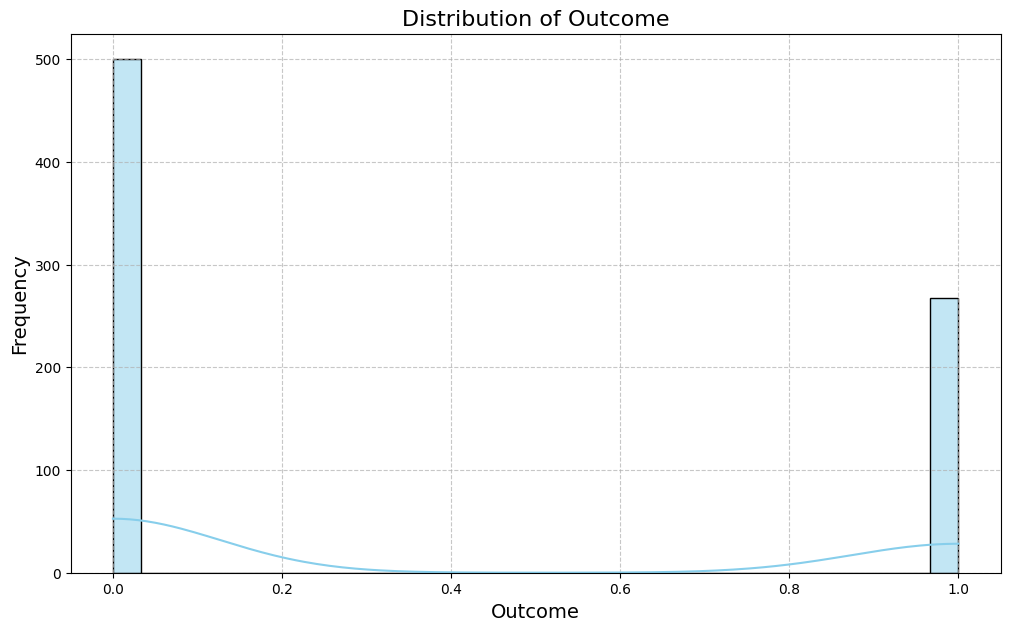

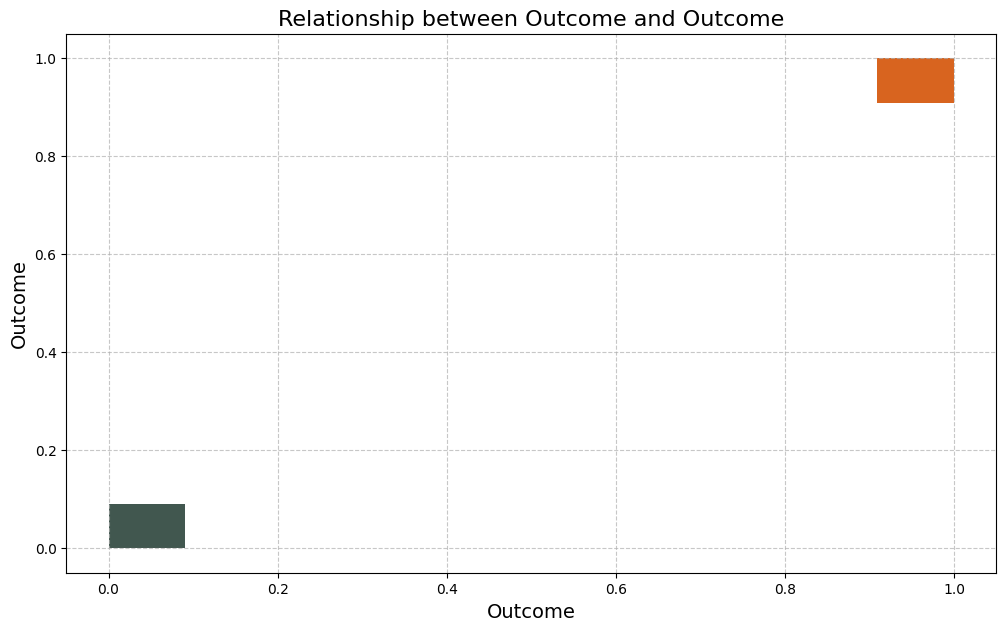

In [ ]:
# Filter out numeric columns for distribution plots
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Plotting for numerical columns: original distribution and relationship with 'class'
for column in numeric_columns:
    # Original Distribution Plot
    plt.figure(figsize=(12, 7))
    sns.histplot(data[column], kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

    # Plot showing relationship with 'class'
    plt.figure(figsize=(12, 7))
    sns.histplot(
        x=column, y="Outcome", data=data, hue="Outcome", palette="Set2", legend=False
    )
    plt.title(f"Relationship between {column} and Outcome", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Outcome", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

    print("\n\n")

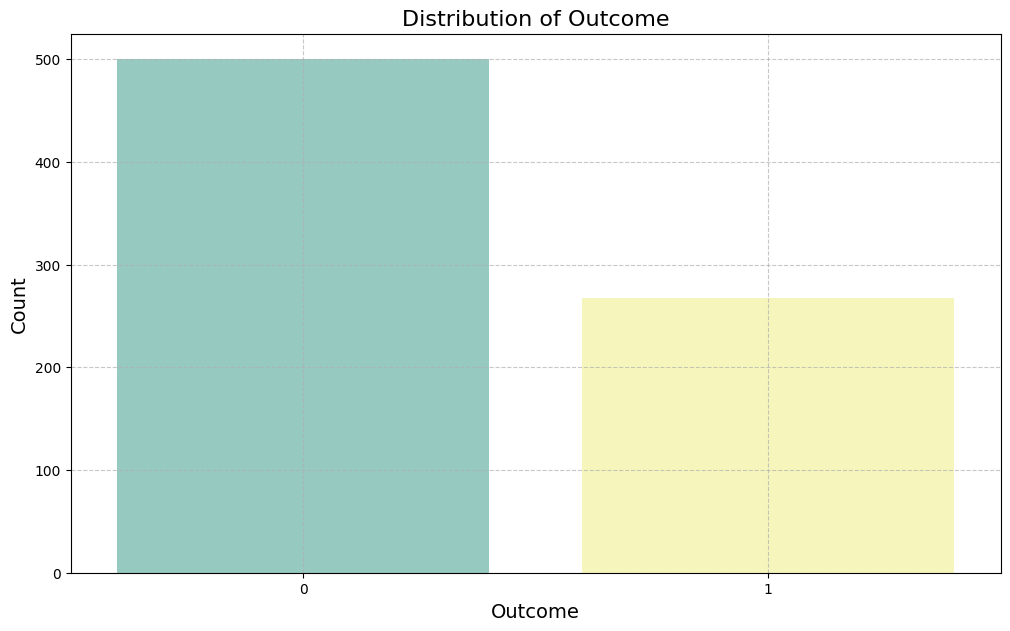

In [ ]:
# Plotting distribution for the column 'class'
plt.figure(figsize=(12, 7))
sns.countplot(x="Outcome", data=data, hue="Outcome", palette="Set3", dodge=False)
plt.title("Distribution of Outcome", fontsize=16)
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend([], [], frameon=False)
plt.show()

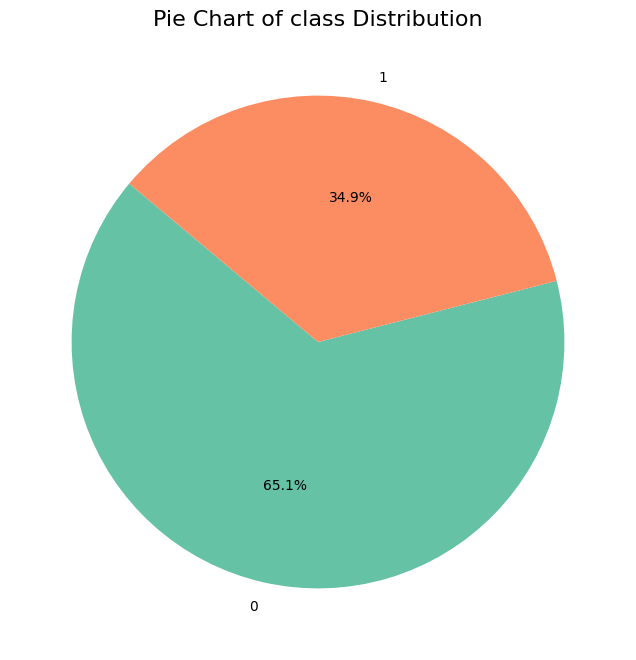

In [ ]:
# Drawing a pie chart for the 'class' column
class_counts = data["Outcome"].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Set2"),
)
plt.title("Pie Chart of class Distribution", fontsize=16)
plt.show()

## Data Preparation and Splitting for Model Training and Testing

In [ ]:
X = data.drop(columns="Outcome")
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Shape of X_Train set : {}".format(X_train.shape))
print("Shape of y_Train set : {}".format(y_train.shape))
print("==============================================")
print("Shape of X_test set : {}".format(X_test.shape))
print("Shape of y_test set : {}".format(y_test.shape))

Shape of X_Train set : (614, 8)
Shape of y_Train set : (614,)
Shape of X_test set : (154, 8)
Shape of y_test set : (154,)


## **Attempt 1**: Using Grid Search and Randomized Search to find the best parameters for our model

In [ ]:
# Parameter Grid
param_options = {
    "n_estimators": [100, 1000],  # Number of trees in the forest
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "max_features": [1, 8, 'sqrt', 'log2', None],  # Number of features to consider at every split
    "max_depth": [None, 10, 20, 30],  # Maximum number of levels in tree
    "bootstrap": [True, False]  # Method of selecting samples for training each tree
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_options,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)  # Fit GridSearchCV to the data
end_time = time.time()
grid_search_time = end_time - start_time

# RandomizedSearchCV with a similar range of parameter options but using distributions where applicable
start_time = time.time()
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions={
        "n_estimators": randint(100, 1000),
        "criterion": ["gini", "entropy"],
        "max_features": [1, 8, 'sqrt', 'log2', None],
        "max_depth": [None, 10, 20, 30],
        "bootstrap": [True, False]
    },
    n_iter=100,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)
random_search.fit(X_train, y_train)  # Fit RandomizedSearchCV to the data
end_time = time.time()
random_search_time = end_time - start_time

# Results
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

# Print the results
print(f"Grid Search took {grid_search_time:.2f} seconds.")
print("Grid Search Best Parameters:", best_params_grid)
print("Grid Search Best Score:", best_score_grid)
print("================================================")
print(f"Randomized Search took {random_search_time:.2f} seconds.")
print("Randomized Search Best Parameters:", best_params_random)
print("Randomized Search Best Score:", best_score_random)


# Compare the best scores from both searches and select the best parameters
best_params = best_params_grid if best_score_grid >= best_score_random else best_params_random

Grid Search took 948.19 seconds.
Grid Search Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Grid Search Best Score: 0.7703851792616287
Randomized Search took 686.89 seconds.
Randomized Search Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 679}
Randomized Search Best Score: 0.7638677862188458


### Training Data

In [ ]:
rf_best = RandomForestClassifier(**best_params)

start_time = time.time()

# Fit the model to the training data
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

end_time = time.time()
rf_best_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)

print("best_params:", best_params)
print(f"Accuracy: {accuracy:.2f}")
print(f"training took {rf_best_time:.2f} seconds.")

best_params: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 0.81
training took 0.23 seconds.


### Feature Importance

In [ ]:
# Feature importances

importances = rf_best.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order and iterate over them
sorted_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Glucose, Importance: 0.24143352481202726
Feature: BMI, Importance: 0.18112623728317956
Feature: Age, Importance: 0.1431476955034002
Feature: DiabetesPedigreeFunction, Importance: 0.12934611035976745
Feature: BloodPressure, Importance: 0.08335316836263347
Feature: Pregnancies, Importance: 0.0775259332253399
Feature: Insulin, Importance: 0.07580559668228486
Feature: SkinThickness, Importance: 0.06826173377136738


### Classification Report

In [ ]:
# Calculate the accuracy
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



### Confussion Matrix

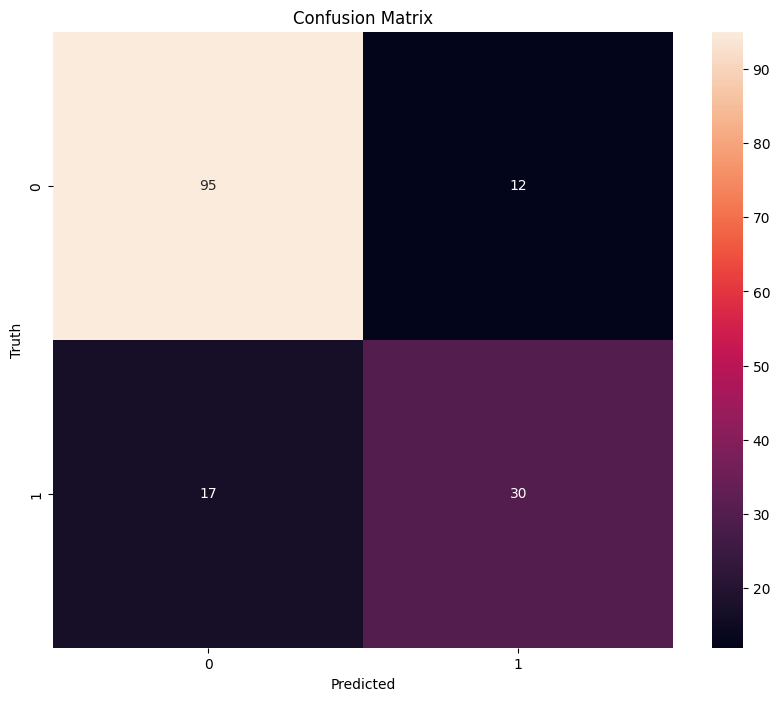

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Draw its plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

#**# Attemp 2**: Using Default parameters for our model

In [ ]:
rf_default = RandomForestClassifier(n_estimators = 1000, max_features = 1) # (1, nd)

start_time = time.time()

# Fit the model to the training data
rf_default.fit(X_train, y_train)
y_pred = rf_default.predict(X_test)

end_time = time.time()
rf_default_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)

# Manually select and display the desired parameters
selected_params = {
    'bootstrap': rf_default.bootstrap,
    'criterion': rf_default.criterion,
    'max_depth': rf_default.max_depth,
    'max_features': rf_default.max_features,
    'n_estimators': rf_default.n_estimators
}

print("Selected params:", selected_params)
print(f"Accuracy: {accuracy:.2f}")
print(f"training took {rf_default_time:.2f} seconds.")

Selected params: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 1000}
Accuracy: 0.81
training took 1.97 seconds.
